In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [42]:
data = pd.read_csv("datos_red_limpios.csv")

In [43]:
features = [col for col in data.columns if col not in ["congestion", "latencia"]]

X = data[features].dropna()
y = data.loc[X.index, "congestion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [44]:
modelos = {
    "GradientBoosting": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel="rbf", probability=True),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
}


===== Modelo: GradientBoosting =====


CV Accuracy: 1.0000 ± 0.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      6640
           1     1.0000    1.0000    1.0000      2433

    accuracy                         1.0000      9073
   macro avg     1.0000    1.0000    1.0000      9073
weighted avg     1.0000    1.0000    1.0000      9073



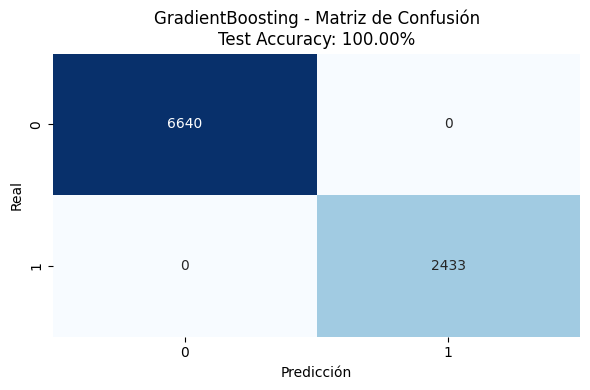


===== Modelo: RandomForest =====
CV Accuracy: 1.0000 ± 0.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      6640
           1     1.0000    1.0000    1.0000      2433

    accuracy                         1.0000      9073
   macro avg     1.0000    1.0000    1.0000      9073
weighted avg     1.0000    1.0000    1.0000      9073



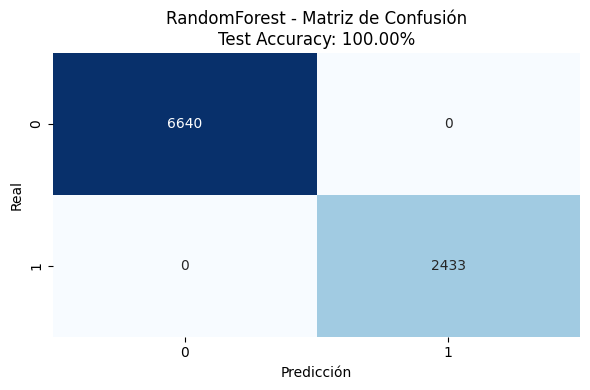


===== Modelo: LogisticRegression =====
CV Accuracy: 0.9992 ± 0.0003
Train Accuracy: 0.9992
Test Accuracy: 0.9989
              precision    recall  f1-score   support

           0     1.0000    0.9985    0.9992      6640
           1     0.9959    1.0000    0.9979      2433

    accuracy                         0.9989      9073
   macro avg     0.9980    0.9992    0.9986      9073
weighted avg     0.9989    0.9989    0.9989      9073



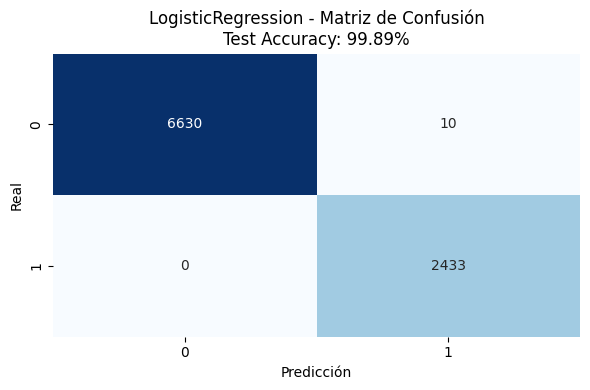


===== Modelo: SVM =====
CV Accuracy: 0.9961 ± 0.0009
Train Accuracy: 0.9974
Test Accuracy: 0.9978
              precision    recall  f1-score   support

           0     0.9970    1.0000    0.9985      6640
           1     1.0000    0.9918    0.9959      2433

    accuracy                         0.9978      9073
   macro avg     0.9985    0.9959    0.9972      9073
weighted avg     0.9978    0.9978    0.9978      9073



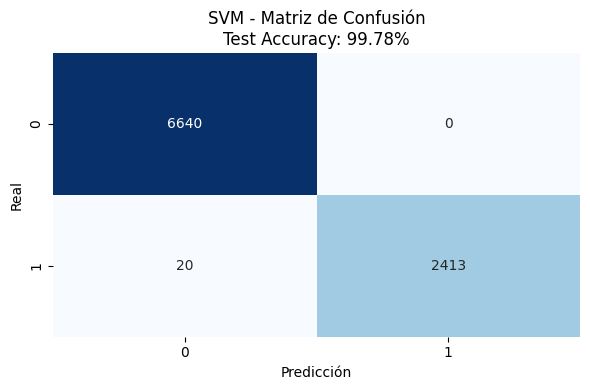


===== Modelo: KNeighbors =====
CV Accuracy: 0.9989 ± 0.0002
Train Accuracy: 0.9996
Test Accuracy: 0.9997
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998      6640
           1     0.9996    0.9992    0.9994      2433

    accuracy                         0.9997      9073
   macro avg     0.9996    0.9995    0.9996      9073
weighted avg     0.9997    0.9997    0.9997      9073



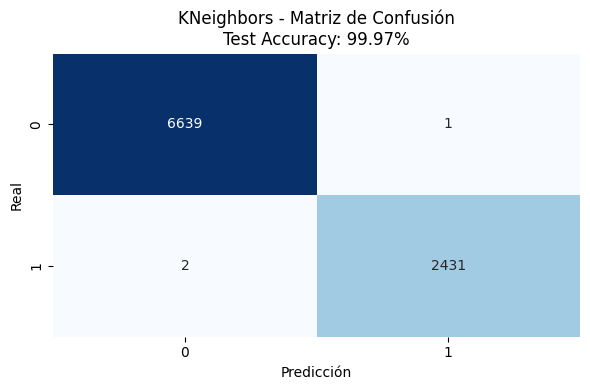


===== Modelo: DecisionTree =====
CV Accuracy: 1.0000 ± 0.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      6640
           1     1.0000    1.0000    1.0000      2433

    accuracy                         1.0000      9073
   macro avg     1.0000    1.0000    1.0000      9073
weighted avg     1.0000    1.0000    1.0000      9073



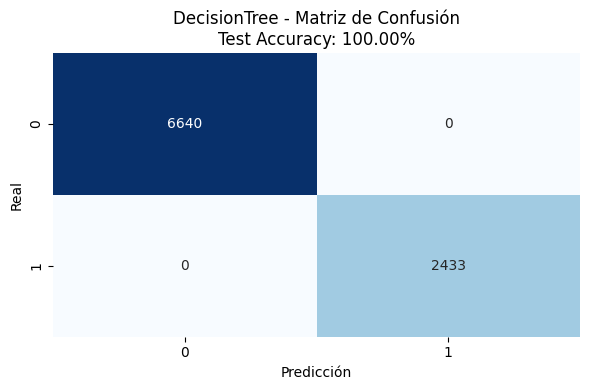


===== Modelo: NeuralNetwork =====
CV Accuracy: 0.9995 ± 0.0003
Train Accuracy: 0.9992
Test Accuracy: 0.9991
              precision    recall  f1-score   support

           0     0.9988    1.0000    0.9994      6640
           1     1.0000    0.9967    0.9984      2433

    accuracy                         0.9991      9073
   macro avg     0.9994    0.9984    0.9989      9073
weighted avg     0.9991    0.9991    0.9991      9073



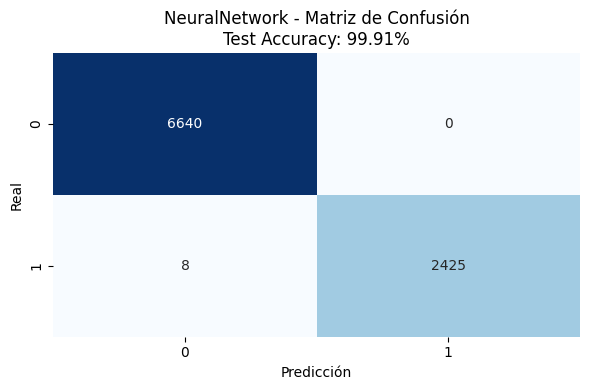

In [45]:
mejor_accuracy = 0
mejor_modelo = None
mejor_nombre = ""

for nombre, modelo in modelos.items():
    print(f"\n===== Modelo: {nombre} =====")

    pipeline = Pipeline([("scaler", RobustScaler()), ("clf", modelo)])

    # Validación cruzada (en los datos de entrenamiento)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Entrenamiento final con todo el X_train
    pipeline.fit(X_train, y_train)

    # Predicción y evaluación
    y_pred = pipeline.predict(X_test)
    accuracy = pipeline.score(X_test, y_test)
    train_accuracy = pipeline.score(X_train, y_train)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

    # Guardar mejor modelo
    if accuracy > mejor_accuracy:
        mejor_accuracy = accuracy
        mejor_modelo = pipeline
        mejor_nombre = nombre

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{nombre} - Matriz de Confusión\nTest Accuracy: {accuracy*100:.2f}%")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()


In [46]:
print("\n" + "=" * 40)
print("MEJOR MODELO")
print(f"Nombre: {mejor_nombre}")
print(f"Accuracy: {round(mejor_accuracy, 4)*100}%")
print("=" * 40)


MEJOR MODELO
Nombre: GradientBoosting
Accuracy: 100.0%


In [47]:
# Guardar el mejor modelo
joblib.dump(mejor_modelo, "predictor.pkl")
print("El mejor modelo ha sido guardado como 'predictor.pkl'")

El mejor modelo ha sido guardado como 'predictor.pkl'
